In [13]:
import glob
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import show
from skimage.feature import hog


In [14]:
# import images for creating dataset
ds_path = 'images'
images_dir = glob.glob(ds_path + "/**/*.png", recursive=True)
len(images_dir)

3278

exploratory data analysis

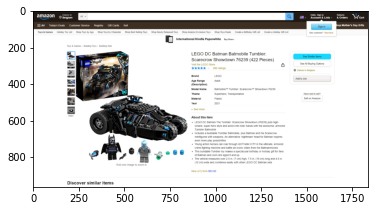

In [15]:
def remove_scrollbar(image):
    # gets rid of scroll bar so that model wont learn from that and returns the image
    y,x,_ = image.shape
    img = image[0:y,0:x-20]
    return img
    
img = remove_scrollbar(cv.imread(images_dir[0]))
plt.imshow(img)


feature selection

dataset creation with selected features

In [16]:
def extract_features(resized_image):
    # applied on resized image
    fd, hog_image = hog(resized_image, orientations=10, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    return fd, hog_image


def resize_image(image, new_size):
    return cv.resize(image, new_size)

In [21]:
# data set preparation
import csv

# size to resize to after future extraction
new_size = (256, 128)

with open('direct_csv.csv', 'w') as csv_file:
    fieldnames = ['file_name', 'label']
    px_values =  ['x_'+str(i) for i in range(20480)] # size of 1d array with these extraction settings
    fieldnames += px_values
    print(len(fieldnames))

    writer=csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    for idx, image_path in enumerate(images_dir):
        label = image_path.split('\\')[1]
        file_name = image_path.split('\\')[2]
        
        image = remove_scrollbar(cv.imread(image_path))

        # feature extraction
        resized_image = resize_image(image, new_size)
        fd, hog_image = extract_features(resized_image)

        # vizualise
        # plt.imshow(hog_image, 'gray')
        # plt.show()
        
        # forming new row
        new_row = {'file_name': file_name, 'label': label}
        print(fd.shape)
        for i,px_val in enumerate(fd.flatten()):
            new_row['x_'+str(i)] = px_val

        writer.writerow(new_row)

        print(idx, '/', len(images_dir))


20482
(20480,)
0 / 3278
(20480,)
1 / 3278
(20480,)
2 / 3278
(20480,)
3 / 3278
(20480,)
4 / 3278
(20480,)
5 / 3278
(20480,)
6 / 3278
(20480,)
7 / 3278
(20480,)
8 / 3278
(20480,)
9 / 3278
(20480,)
10 / 3278
(20480,)
11 / 3278
(20480,)
12 / 3278
(20480,)
13 / 3278
(20480,)
14 / 3278
(20480,)
15 / 3278
(20480,)
16 / 3278
(20480,)
17 / 3278
(20480,)
18 / 3278
(20480,)
19 / 3278
(20480,)
20 / 3278
(20480,)
21 / 3278
(20480,)
22 / 3278
(20480,)
23 / 3278
(20480,)
24 / 3278
(20480,)
25 / 3278
(20480,)
26 / 3278
(20480,)
27 / 3278
(20480,)
28 / 3278
(20480,)
29 / 3278
(20480,)
30 / 3278
(20480,)
31 / 3278
(20480,)
32 / 3278
(20480,)
33 / 3278
(20480,)
34 / 3278
(20480,)
35 / 3278
(20480,)
36 / 3278
(20480,)
37 / 3278
(20480,)
38 / 3278
(20480,)
39 / 3278
(20480,)
40 / 3278
(20480,)
41 / 3278
(20480,)
42 / 3278
(20480,)
43 / 3278
(20480,)
44 / 3278
(20480,)
45 / 3278
(20480,)
46 / 3278
(20480,)
47 / 3278
(20480,)
48 / 3278
(20480,)
49 / 3278
(20480,)
50 / 3278
(20480,)
51 / 3278
(20480,)
52 / 32